# Яндекс. Тестовое задание

**Задача:** тестовое задание для аналитической секции Яндекса  
**Датасет:** реестр запросов пользователей я Яндекс Картинках в сентября 2021 года  
**Сегментация:** touch и desktop  
**Срок выполнения:** 90 минут

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data.tsv", sep="\t", header=0, names = ("query", "ts", "ui"))
print('Исходный датасет')
print(f'Количество строк {df.shape[0]}')
print(f'Количество столбцов {df.shape[1]}')

Исходный датасет
Количество строк 1203823
Количество столбцов 3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203823 entries, 0 to 1203822
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   query   1203823 non-null  object
 1   ts      1203823 non-null  int64 
 2   ui      1203823 non-null  object
dtypes: int64(1), object(2)
memory usage: 27.6+ MB


In [4]:
df.sample(7)

,query,ts,ui
1194640,лол раскраска,1632039516,desktop
645591,раскраска,1631599375,desktop
813904,фон для презентации,1631641324,desktop
682172,Реки России,1631431186,desktop
1013941,как выглядит геморрой,1631822279,touch
778151,пере,1631447383,desktop
1134830,с днём рождения мужчине открытки,1631340879,touch


Приведем все запросы к lowercase

In [5]:
df['query'] = df['query'].str.lower()

Проверим на дубликаты

In [6]:
mydups = df.duplicated().sum()
print('Количество полных дубликтов в датасете', mydups)

Количество полных дубликтов в датасете 565


Проверим на пропуски

In [7]:
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('bwr')

,0
query,0.000000
ts,0.000000
ui,0.000000


Проверим реальные ли дубликаты или просто популярный запрос

In [8]:
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows.sample(12)

,query,ts,ui
964099,ню,1630615360,touch
81798,xxx,1631727333,touch
216932,с днём рождения мужчине,1630832224,touch
706911,пионы,1631375764,touch
563128,раскраски,1631529630,desktop
1027057,рождество пресвятой богородицы,1632219725,touch
846227,с 1 сентября,1630470624,touch
1163699,ххх,1631515819,touch
27966,18+,1630561637,touch
449953,порно,1631624820,touch


Вытащим из непонятных циферок дату и время

In [9]:
import datetime as dt
df['h'] = pd.to_datetime(df['ts'], unit='s').dt.hour
df['d'] = pd.to_datetime(df['ts'], unit='s').dt.day
df['m'] = pd.to_datetime(df['ts'], unit='s').dt.month
df['y'] = pd.to_datetime(df['ts'], unit='s').dt.year
df.sample(3)

,query,ts,ui,h,d,m,y
188449,мокрая коала почему нельзя гуглить,1631997724,touch,20,18,9,2021
1082149,высоцкий,1631605808,desktop,7,14,9,2021
851390,blacked,1631737835,touch,20,15,9,2021


Разделим датасеты по типу устройства

In [26]:
df_t = df.query('ui == "touch" ')
df_d = df.query('ui == "desktop" ')

Определим диапазон исследования

In [11]:
df.groupby(['y','ui','m', 'd'])['ts'].agg(['count'])

count
y    ui      m d        
2021 desktop 8 31    703
             9 1   17793
               2   18199
               3   17265
               4   14281
               5   16871
               6   20255
               7   20735
               8   22161
               9   22043
               10  18669
               11  14705
               12  17853
               13  21547
               14  22204
               15  22016
               16  21394
               17  20570
               18  16229
               19  19107
               20  23921
               21  23045
     touch   8 31   2297
             9 1   46930
               2   34781
               3   36453
               4   34087
               5   36392
               6   36492
               7   36714
               8   39316
               9   37519
               10  34747
               11  35593
               12  38366
               13  38980
               14  38033
               15  37791
               16  37254
               17  36369
               18  35854
               19  37871
               20  39155
               21  41263

Посмотрим общее количество запросов за период

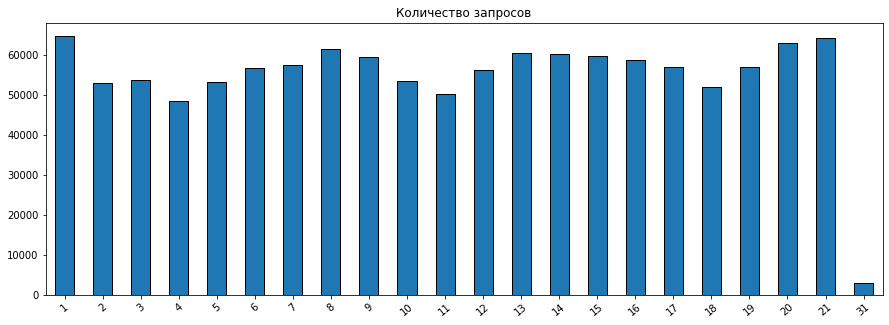

In [12]:
df.groupby('d')['query'].count().plot(
            kind='bar', y='query', figsize=(15,5), edgecolor='black')
plt.title('Количество запросов')
plt.xticks(rotation=40)
plt.xlabel('')
plt.show()

Запросы по touch

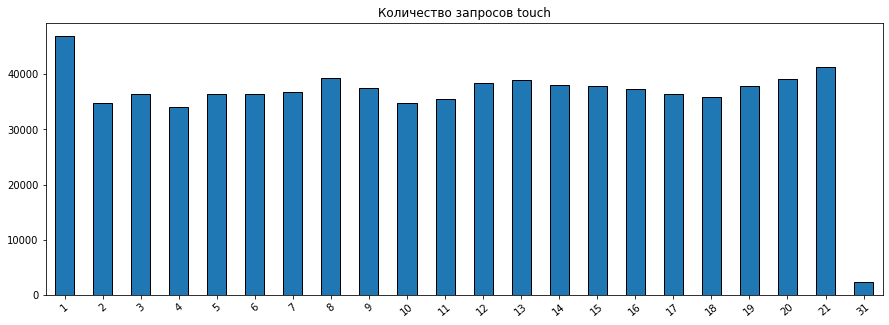

In [13]:
df_t.groupby('d')['query'].count().plot(
            kind='bar', y='query', figsize=(15,5), edgecolor='black')
plt.title('Количество запросов touch')
plt.xticks(rotation=40)
plt.xlabel('')
plt.show()

Запросы по descktop

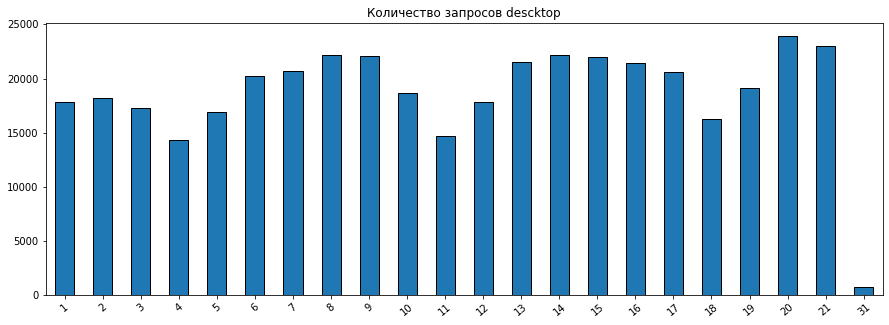

In [14]:
df_d.groupby('d')['query'].count().plot(
            kind='bar', y='query', figsize=(15,5), edgecolor='black')
plt.title('Количество запросов descktop')
plt.xticks(rotation=40)
plt.xlabel('')
plt.show()

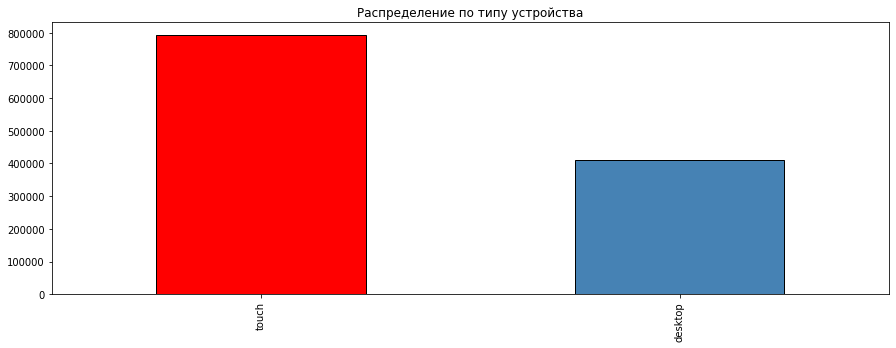

In [31]:
other_data = df.groupby(['ui'])['query'].count().sort_values(ascending=False).head()
other_data.plot(y='ui', kind='bar', figsize=(15,5),
              color=['red', 'steelblue'],
              edgecolor='black'
             )
plt.title('Распределение по типу устройства')
plt.ylabel('')
plt.xlabel('')
plt.show()

**Самые популярные запросы (полное совпадение)**

In [15]:
df['query'].value_counts().reset_index().head(33)

,index,query
0,порно,11484
1,секс,9209
2,с днём рождения женщине,5427
3,календарь 2021,5078
4,хентай,5015
5,таблица менделеева,4937
6,с днём рождения,4420
7,с днём рождения мужчине,4001
8,с днем рождения,3769
9,картинки,3521


In [16]:
df_d['query'].value_counts().reset_index().head(13)

,index,query
0,календарь 2021,2810
1,таблица менделеева,2659
2,картинки,1720
3,порно,1408
4,английский алфавит,1352
5,обои на рабочий стол,1143
6,одноклассники (социальная сеть),1116
7,секс,947
8,алфавит,923
9,таблица квадратов,883


In [17]:
df_t['query'].value_counts().reset_index().head(13)

,index,query
0,порно,10076
1,секс,8262
2,с днём рождения женщине,4924
3,хентай,4194
4,с днём рождения,4123
5,с днём рождения мужчине,3669
6,с днем рождения,3315
7,xxx,3249
8,xnxx,2767
9,доброе утро,2342


**Построим тепловую карту по активности пользователей**

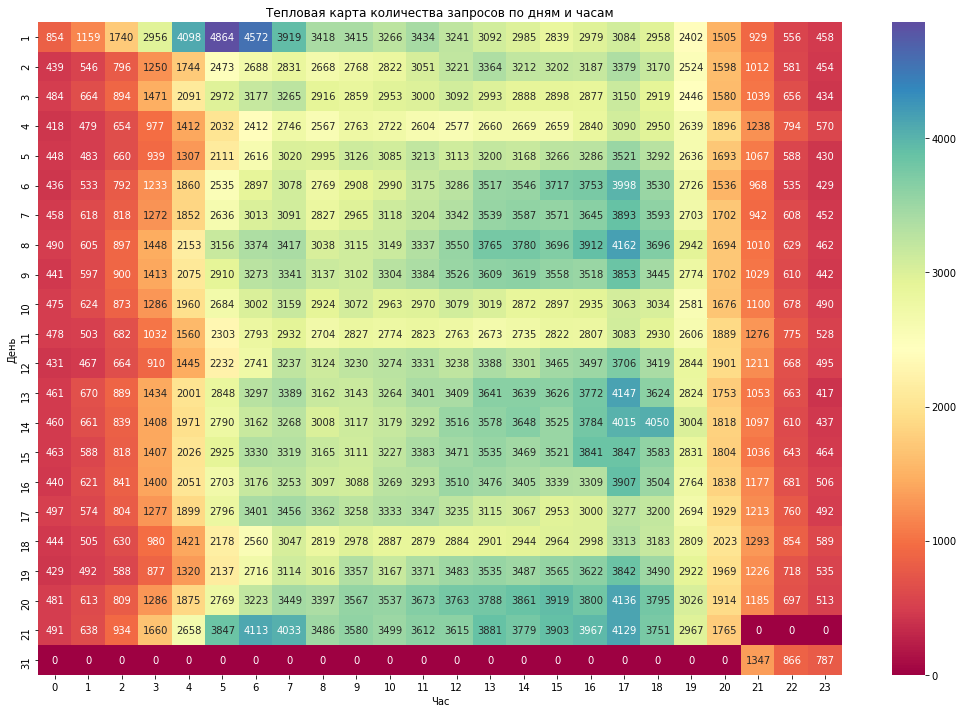

In [18]:
pivot_table = df.pivot_table(index='d', columns='h', aggfunc='size', fill_value=0)
# Строим тепловую карту
plt.figure(figsize=(18, 12))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Spectral')
plt.title('Тепловая карта количества запросов по дням и часам')
plt.xlabel('Час')
plt.ylabel('День')
plt.show()

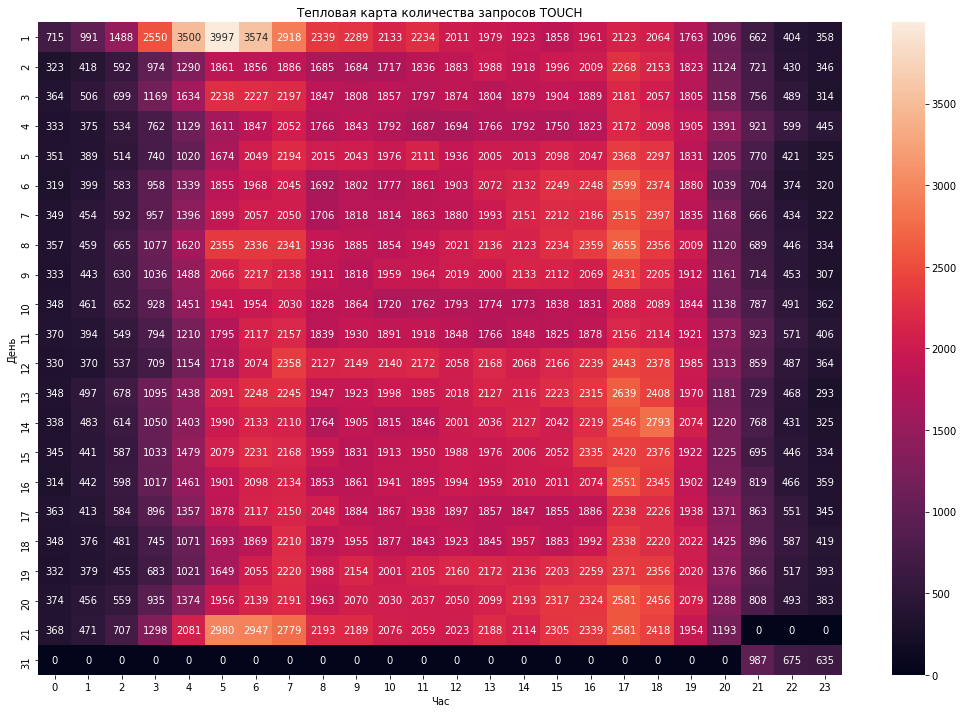

In [19]:
pivot_table = df_t.pivot_table(index='d', columns='h', aggfunc='size', fill_value=0)

# Строим тепловую карту
plt.figure(figsize=(18, 12))
sns.heatmap(pivot_table, annot=True, fmt='d')
plt.title('Тепловая карта количества запросов TOUCH')
plt.xlabel('Час')
plt.ylabel('День')
plt.show()

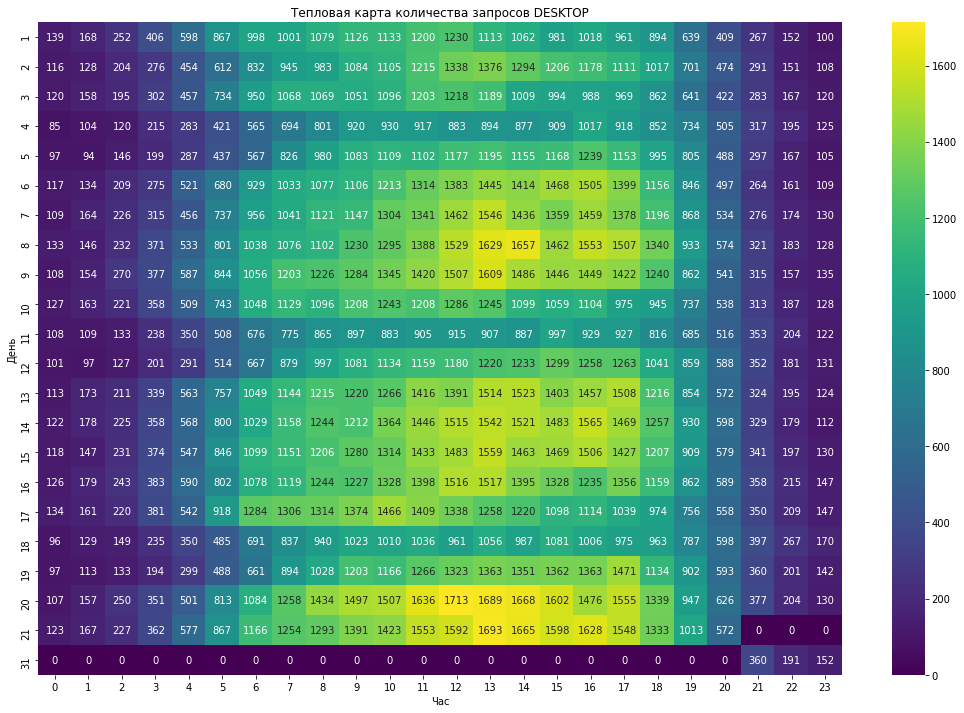

In [20]:
pivot_table = df_d.pivot_table(index='d', columns='h', aggfunc='size', fill_value=0)

# Строим тепловую карту
plt.figure(figsize=(18, 12))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='viridis')
plt.title('Тепловая карта количества запросов DESKTOP')
plt.xlabel('Час')
plt.ylabel('День')
plt.show()

**Выводы**: в рамках экспресс EDA было произведено исследование датасета запросов Яндекс Картинок. В рамках задачи были определены особенности и отличия изучаемых сегментов, а также определен диапазон дат выборки.

Вопросы **заказчика**:
1. Выведите топ10 самых частотных запросов в каждой платформе (desktop, touch). Какие отличия вы видите?  
⏩Вижу, что тематика самых частотных запросов между пользователями desktop, touch отличается.   
⏩Сегмент пользователей и запросов desktop значительно больше desktop.  
⏩Рекорд запросов по touch приходится на 1 сентября.  
2. Посмотрите, чем отличается трафик запросов в течении дня. Как можно объяснить отличие  
⏩Пользователи touch используют свое устройство ежедневно, оно всегда с ними. Пользователи desktop имеют активную фазу в рабочее время. Вероятно большая часть этого сегмента приходится на офисных сотрудников или школьников.   
⏩Рекордная активность в touch на 1 сентября не зеркалит desktop. Вероятно большую часть этого траффика сделали школьники и их родители.
3. Выделите тематики запросов, контрастные для мобильных и компьютеров - темы, доля которых отличаются на разных платформах  
⏩У пользователей desktop уклон в рабочие, учебные задачи, у пользователей touch уклон в личные задачи.  

Итог: в рамках ограниченного времени удалось провести экспресс-анализ и выявить верхнеуровневые тенденции. Попытка быстрой сегментации по ключевым словам не привела к успеху по выделению подсегментов, для этой задачи требуется больше времени на исследование.  

**Общий вывод**: клиентское поведение пользователей двух выделенных сегментов отличается. Временные диапазоны активности так же имеют отличия.